In [1]:
# import the libraries 

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import keras as keras
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images 
IMAGE_SIZE = (224, 224, 3)

train_path = "C:\\Users\\omark\\OneDrive\\Desktop\\Apps\\Health App\\Covid19_Pneumonia\\Dataset\\Train"
test_path = "C:\\Users\\omark\\OneDrive\\Desktop\\Apps\\Health App\\Covid19_Pneumonia\\Dataset\\Test"

In [3]:
# Impor nasnet library
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob("C:\\Users\\omark\\OneDrive\\Desktop\\Apps\\Health App\\Covid19_Pneumonia\\Dataset\\Train/*")

In [6]:
folders

['C:\\Users\\omark\\OneDrive\\Desktop\\Apps\\Health App\\Covid19_Pneumonia\\Dataset\\Train\\COVID19',
 'C:\\Users\\omark\\OneDrive\\Desktop\\Apps\\Health App\\Covid19_Pneumonia\\Dataset\\Train\\Normal',
 'C:\\Users\\omark\\OneDrive\\Desktop\\Apps\\Health App\\Covid19_Pneumonia\\Dataset\\Train\\Pneumonia']

In [7]:
x = Flatten()(mobilenet.output)
x = keras.layers.Dropout(0.2)(x)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss="categorical_crossentropy",
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

Found 9649 images belonging to 3 classes.


In [12]:
test_set = train_datagen.flow_from_directory(test_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1622 images belonging to 3 classes.


In [13]:
# Check classes
training_set.class_indices

{'COVID19': 0, 'Normal': 1, 'Pneumonia': 2}

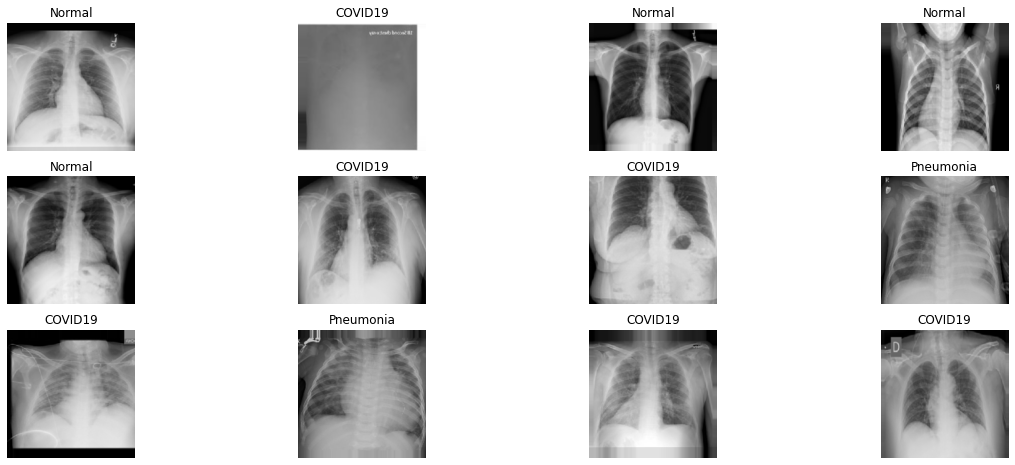

In [16]:
labels = ["COVID19", "Normal","Pneumonia"]
sample_data = training_set.__getitem__(1)[0] 
sample_label = training_set.__getitem__(1)[1] 

plt.figure(figsize=(20,8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.imshow(sample_data[i])
    plt.title(labels[np.argmax(sample_label[i])])

In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
)

C:\Users\omark\anaconda3\envs\gputest\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
302/302 [==============================] - 189s 546ms/step - loss: 1.6680 - accuracy: 0.8283 - val_loss: 0.9825 - val_accuracy: 0.8829
Epoch 2/10
302/302 [==============================] - 106s 350ms/step - loss: 0.6245 - accuracy: 0.9379 - val_loss: 0.8569 - val_accuracy: 0.9131
Epoch 3/10
302/302 [==============================] - 106s 350ms/step - loss: 0.7990 - accuracy: 0.9380 - val_loss: 3.2499 - val_accuracy: 0.8274
Epoch 4/10
302/302 [==============================] - 102s 338ms/step - loss: 0.6981 - accuracy: 0.9504 - val_loss: 2.0470 - val_accuracy: 0.8841
Epoch 5/10
302/302 [==============================] - 107s 354ms/step - loss: 0.6886 - accuracy: 0.9495 - val_loss: 0.9468 - val_accuracy: 0.9303
Epoch 6/10
302/302 [==============================] - 108s 359ms/step - loss: 0.6302 - accuracy: 0.9543 - val_loss: 1.1894 - val_accuracy: 0.9174
Epoch 7/10
302/302 [==============================] - 104s 345ms/step - loss: 0.5830 - accuracy: 0.9586 - val_loss: 2.9221 -

In [17]:
# Save model
model.save('model_new_COVID19.h5')

C:\Users\omark\anaconda3\envs\gputest\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
